<a href="https://colab.research.google.com/github/apolanco3225/Pytorch-Exercises/blob/master/intro_pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])

trainset = datasets.MNIST('mnist', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:02, 4607808.89it/s]                             


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 67105.10it/s]                            
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1110256.63it/s]                           
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 25303.32it/s]            

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(images.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])


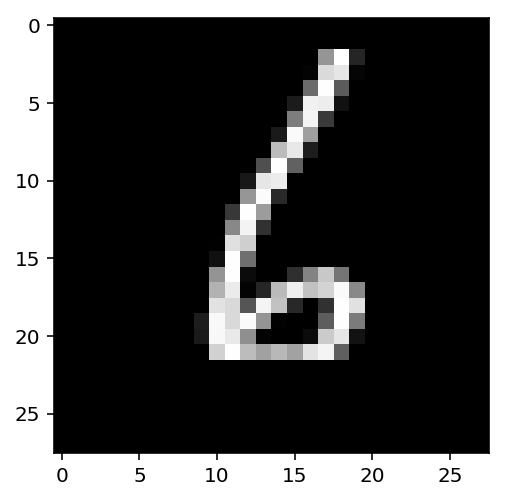

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [0]:
def activation(x):
  return 1 / (1 + torch.exp(-x))

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [10]:
def softmax(x):
  return torch.exp(x) *  torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([3.4514e+22, 2.5215e+21, 6.4784e+14, 1.9115e+21, 3.6725e+21, 6.6377e+12,
        3.3540e+15, 8.9775e+12, 1.1326e+24, 2.0810e+23, 1.1283e+24, 1.1400e+15,
        1.1388e+14, 4.9113e+18, 5.7417e+10, 4.0508e+14, 1.3219e+22, 2.1596e+13,
        1.1619e+20, 4.7523e+14, 2.7141e+18, 2.6718e+17, 1.7382e+20, 8.1476e+22,
        1.1582e+26, 7.3798e+24, 3.0818e+24, 4.4848e+15, 3.3880e+22, 8.1393e+15,
        7.6799e+17, 4.4559e+29, 2.7520e+22, 3.2446e+20, 1.0376e+22, 1.0065e+29,
        4.5426e+23, 3.9690e+21, 9.7728e+21, 3.9499e+15, 9.4729e+16, 4.0847e+11,
        1.7983e+16, 1.1335e+26, 1.0321e+23, 3.1534e+23, 3.9456e+21, 5.2062e+24,
        7.6818e+13, 2.8095e+16, 1.8860e+16, 2.3518e+21, 5.9413e+15, 3.1812e+23,
        4.2728e+22, 6.9883e+15, 2.7635e+17, 8.5028e+21, 1.6319e+23, 2.7350e+17,
        3.3133e+16, 8.9764e+18, 1.5220e+17, 1.0413e+19])


In [0]:
from torch import nn

In [12]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)
    
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x - self.softmax(x)
    return x
  
  
model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)


In [0]:
import torch.nn.functional as F

In [14]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)
    
  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)
    return x
  
model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)


In [16]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
    
  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x, dim=1)
    return x
  
model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-2.6431e-02, -3.0018e-02, -1.5499e-03,  ...,  3.3230e-05,
         -3.3160e-02,  2.4564e-02],
        [-2.8066e-02,  8.4079e-03, -6.9863e-03,  ..., -1.8263e-02,
          3.3524e-02,  2.5045e-03],
        [ 3.7139e-03, -3.4190e-02, -3.3724e-02,  ...,  1.6031e-02,
         -1.3719e-02, -3.2571e-02],
        ...,
        [-1.2223e-02,  1.7930e-02,  2.0775e-02,  ...,  1.6863e-02,
          2.2159e-02, -3.4555e-02],
        [ 1.4184e-02,  8.6680e-03,  1.4237e-02,  ..., -1.8713e-02,
          9.8693e-03,  2.1303e-02],
        [-2.1376e-02,  2.2429e-02, -1.3950e-02,  ..., -1.8598e-02,
          2.9277e-02,  1.7413e-02]], requires_grad=True)
Parameter containing:
tensor([ 0.0029, -0.0115,  0.0282,  0.0202, -0.0234,  0.0280, -0.0042,  0.0175,
        -0.0281, -0.0246, -0.0002, -0.0059, -0.0041, -0.0217, -0.0079, -0.0220,
        -0.0344,  0.0132,  0.0081, -0.0356,  0.0338, -0.0143, -0.0113,  0.0320,
        -0.0247, -0.0084,  0.0085, -0.0308, -0.0306,  0.0009,  0

In [18]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-3.5246e-03, -1.6293e-02, -6.6619e-03,  ..., -1.0475e-02,
          9.9723e-03,  1.3700e-02],
        [-6.1713e-03, -7.8639e-03,  4.3656e-03,  ...,  5.7435e-03,
          2.4099e-02,  2.1508e-02],
        [-6.5165e-03, -1.3149e-02, -1.2164e-02,  ..., -2.0897e-04,
         -1.9824e-02,  1.2908e-02],
        ...,
        [ 1.2431e-02,  1.1216e-02, -1.2004e-02,  ...,  1.0925e-02,
          4.6353e-05, -8.0218e-03],
        [-1.1353e-02,  6.4869e-03, -9.5364e-03,  ...,  7.1908e-03,
         -1.3362e-02, -1.5820e-03],
        [ 3.1552e-03, -7.9091e-03, -3.9753e-03,  ...,  4.1288e-03,
         -1.1971e-02,  1.3998e-02]])